# ***Dancing to the Top: An Analysis of Danceability in K-Pop Music*** 

## *Feature Information*

K-pop music is a genre of popular music that originated in South Korea. It is characterized by a wide variety of elements including catchy melodies, electronic beats, and incorporation of traditional Korean music. The lyrics of K-pop songs often revolve around themes of love, relationships, and personal growth.

Dance is an important aspect of K-pop music, and many K-pop groups are known for their synchronized and complex choreography. The dance moves are often influenced by hip hop and other modern dance styles, and are usually accompanied by colorful and elaborate costumes. K-pop dance routines are frequently featured in music videos, live performances, and televised competitions. In recent years, K-pop dance has become popular around the world, with many people learning and performing the choreography of their favorite K-pop songs.

This project will perform Random Forest Classifier on the training data and output the average score. The model is then trained on the entire training set and evaluated on the testing set. The accuracy score, confusion matrix, and classification report are also.

1.	songID: A unique identifier for each song in the dataset. It could be an arbitrary number or an alphanumeric code that distinguishes each song from the others.
2.	title: The name of the song. This column contains the titles of the songs in the dataset.
3.	artist: The name of the artist or group that created the song. This column contains the names of the artists who performed the songs in the dataset.
4.	danceability: A measure of how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. This column contains values ranging from 0 to 1, with higher values indicating that the song is more danceable.
5.	energy: A measure of the intensity and activity of the music, typically derived from a combination of loudness, dynamic range, and timbre. This column contains values ranging from 0 to 1, with higher values indicating that the song is more energetic.
6.	key: The key of the song, which determines its tonality and the set of notes that can be used in the melody. This column contains integers representing the key of each song, with 0 corresponding to the key of C, 1 to the key of C#, and so on.
7.	loudness: A measure of the overall volume of the song, typically expressed in decibels (dB). This column contains values ranging from -60 dB to 0 dB, with higher values indicating that the song is louder.
8.	mode: A binary variable indicating whether the song is in a major key (mode = 1) or a minor key (mode = 0).
9.	speechiness: A measure of how much spoken word there is in the song. This column contains values ranging from 0 to 1, with higher values indicating that the song contains more spoken word.
10.	acousticness: A measure of how acoustic the song is, based on the proportion of acoustic elements in the track. This column contains values ranging from 0 to 1, with higher values indicating that the song is more acoustic.
11.	valence: A measure of the musical positivity or negativity conveyed by a song, typically determined by its harmonic progression and timbre. This column contains values ranging from 0 to 1, with higher values indicating that the song is more positive.
12.	tempo: The speed or pace of the song, typically measured in beats per minute (BPM). This column contains numerical values representing the tempo of each song.
13.	duration_ms: The length of the song in milliseconds. This column contains numerical values representing the duration of each song in milliseconds.
14.	time_signature: A numeric representation of the number of beats in each bar of the song. This column contains integers representing the time signature of each song

The target feature is "danceability_class", which is derived from the "danceability" feature and is categorized into three classes: "Low", "Medium", and "High". The classification was done by binning the continuous "danceability" feature into these three categories based on their respective ranges.




## *Importing Libraries*

In [1]:
#importing necessary librarise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#if any warnings to ignore it 
import warnings 
warnings.filterwarnings('ignore')

## *Reading Dataset*

In [3]:
#read dataset using pandas and print first 10 records of dataset
kpop=pd.read_csv('KpopHits.csv')
kpop.head(10)

,songID,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,time_signature
0,1,OMG,NewJeans,0.764,0.821,2,-4.015,1,0.0628,0.06890,0.651,123.99,203402,4
1,2,Hype Boy,NewJeans,0.852,0.932,1,-3.784,0,0.0526,0.00212,0.802,134.01,190701,4
2,3,That That,Psy and Suga,0.765,0.857,6,-2.706,1,0.1230,0.03210,0.641,120.02,222149,4
3,4,Love Dive,IVE,0.673,0.821,8,-4.175,1,0.0368,0.01450,0.348,102.99,255299,4
4,5,Run BTS,BTS,0.788,0.913,11,-2.106,1,0.0429,0.09810,0.729,146.01,213758,4
5,6,Antifragile,LE SSERAFIM,0.843,0.856,4,-5.318,1,0.0398,0.19700,0.548,120.99,176991,4
6,7,Wa Da Da,Kep1er,0.794,0.894,9,-3.356,1,0.0562,0.08990,0.743,128.01,202763,4
7,8,Typa Girl,BLACKPINK,0.769,0.950,10,-1.951,0,0.1070,0.01060,0.867,123.99,218152,4
8,9,Hot,SEVENTEEN,0.806,0.934,5,-3.191,1,0.0638,0.00613,0.742,126.99,213386,4
9,10,Dice,NMIXX,0.824,0.891,11,-3.276,1,0.0869,0.01680,0.782,120.99,214840,4


In [4]:
# Define the target variable
kpop['danceability_class'] = pd.cut(kpop['danceability'], bins=[0, 0.5, 0.8, 1.0], labels=['Low', 'Medium', 'High'])
kpop.head(10)

,songID,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,time_signature,danceability_class
0,1,OMG,NewJeans,0.764,0.821,2,-4.015,1,0.0628,0.06890,0.651,123.99,203402,4,Medium
1,2,Hype Boy,NewJeans,0.852,0.932,1,-3.784,0,0.0526,0.00212,0.802,134.01,190701,4,High
2,3,That That,Psy and Suga,0.765,0.857,6,-2.706,1,0.1230,0.03210,0.641,120.02,222149,4,Medium
3,4,Love Dive,IVE,0.673,0.821,8,-4.175,1,0.0368,0.01450,0.348,102.99,255299,4,Medium
4,5,Run BTS,BTS,0.788,0.913,11,-2.106,1,0.0429,0.09810,0.729,146.01,213758,4,Medium
5,6,Antifragile,LE SSERAFIM,0.843,0.856,4,-5.318,1,0.0398,0.19700,0.548,120.99,176991,4,High
6,7,Wa Da Da,Kep1er,0.794,0.894,9,-3.356,1,0.0562,0.08990,0.743,128.01,202763,4,Medium
7,8,Typa Girl,BLACKPINK,0.769,0.950,10,-1.951,0,0.1070,0.01060,0.867,123.99,218152,4,Medium
8,9,Hot,SEVENTEEN,0.806,0.934,5,-3.191,1,0.0638,0.00613,0.742,126.99,213386,4,High
9,10,Dice,NMIXX,0.824,0.891,11,-3.276,1,0.0869,0.01680,0.782,120.99,214840,4,High


This line of code is used to create a new column in the dataframe called danceability_class. This column is created by cutting the values in the danceability column into discrete intervals. The intervals are defined by the bins parameter, which is a list of values that define the boundaries of the intervals. In this case, the intervals are [0, 0.5], [0.5, 0.8], [0.8, 1.0]. The left endpoint is included in the interval and the right endpoint is excluded.

The labels parameter specifies the labels to be assigned to each interval. In this case, the labels are 'Low', 'Medium', and 'High'. The label assigned to each value in the danceability column is determined by which interval it falls into.

For example, if a value in the danceability column is 0.4, it falls into the interval [0, 0.5) and is assigned the label 'Low' in the danceability_class column. If a value in the danceability column is 0.7, it falls into the interval [0.5, 0.8) and is assigned the label 'Medium' in the danceability_class column. And so on.

In [5]:
#information about dataset like no of rows, no of columns, data-type and non-null values counts.
kpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   songID              595 non-null    int64   
 1   title               595 non-null    object  
 2   artist              595 non-null    object  
 3   danceability        595 non-null    float64 
 4   energy              595 non-null    float64 
 5   key                 595 non-null    int64   
 6   loudness            595 non-null    float64 
 7   mode                595 non-null    int64   
 8   speechiness         595 non-null    float64 
 9   acousticness        595 non-null    float64 
 10  valence             595 non-null    float64 
 11  tempo               595 non-null    float64 
 12  duration_ms         595 non-null    int64   
 13  time_signature      595 non-null    int64   
 14  danceability_class  595 non-null    category
dtypes: category(1), float64(7), int64(5), ob

In [6]:
#displaying summary statistics like count, mean, min, max, std, etc of the numerical columns
kpop.describe()

,songID,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,time_signature
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,298.000000,0.668101,0.752534,5.552941,-4.479953,0.573109,0.083380,0.205902,0.564126,122.325108,216114.959664,3.988235
std,171.905982,0.127076,0.173034,3.591301,2.476073,0.495042,0.066649,0.239124,0.216644,24.605154,29774.538359,0.135572
min,1.000000,0.219000,0.070300,0.000000,-17.327000,0.000000,0.025200,0.000219,0.042600,61.450000,145334.000000,3.000000
25%,149.500000,0.598500,0.667000,2.000000,-5.492500,0.000000,0.039750,0.031500,0.400500,104.482000,196858.500000,4.000000
50%,298.000000,0.692000,0.807000,6.000000,-4.081000,1.000000,0.059200,0.098100,0.582000,123.041000,210893.000000,4.000000
75%,446.500000,0.756000,0.880000,9.000000,-2.920000,1.000000,0.096700,0.304000,0.729000,134.819500,229240.000000,4.000000
max,595.000000,0.962000,0.991000,11.000000,-0.384000,1.000000,0.444000,0.990000,0.970000,208.064000,411713.000000,5.000000


Calling the describe() method on this dataset would provide statistical information on the numerical columns.

For example, it would provide information on the central tendency (mean, median), spread (standard deviation, range), and distribution (skewness, kurtosis) of the data for each numerical column.

Additionally, it would provide information on the number of non-null entries, which can be used to check for missing values in the dataset.

Overall, calling kpop.describe() can provide useful insights into the dataset and can help in the exploratory data analysis process.

In [7]:
#display the shape(no of rows and columns) of the dataset
kpop.shape

(595, 15)

In [8]:
#display the size(total no of rows x columns) of the dataset
kpop.size

8925

In [9]:
#display value counts of first 5 records from artist column
kpop['artist'].value_counts()[:5]

BTS           17
TWICE         17
Red Velvet    12
BIGBANG       11
BLACKPINK     10
Name: artist, dtype: int64

In [10]:
#display value counts of records from danceability_class column
kpop["danceability_class"].value_counts()

Medium    452
High       76
Low        67
Name: danceability_class, dtype: int64

## *Cleaning Dataset*

In [11]:
#display total values present in each column with count
kpop.count()

songID                595
title                 595
artist                595
danceability          595
energy                595
key                   595
loudness              595
mode                  595
speechiness           595
acousticness          595
valence               595
tempo                 595
duration_ms           595
time_signature        595
danceability_class    595
dtype: int64

In [12]:
#to check duplicate values present in dataset
kpop_duplicate_val=kpop[kpop.duplicated()]
kpop_duplicate_val.count()

songID                0
title                 0
artist                0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
valence               0
tempo                 0
duration_ms           0
time_signature        0
danceability_class    0
dtype: int64

In [13]:
#to check null value present in dataset
kpop_null_val=kpop[kpop.isnull()]
kpop_null_val.count()

songID                0
title                 0
artist                0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
valence               0
tempo                 0
duration_ms           0
time_signature        0
danceability_class    0
dtype: int64

## *Boxplot*

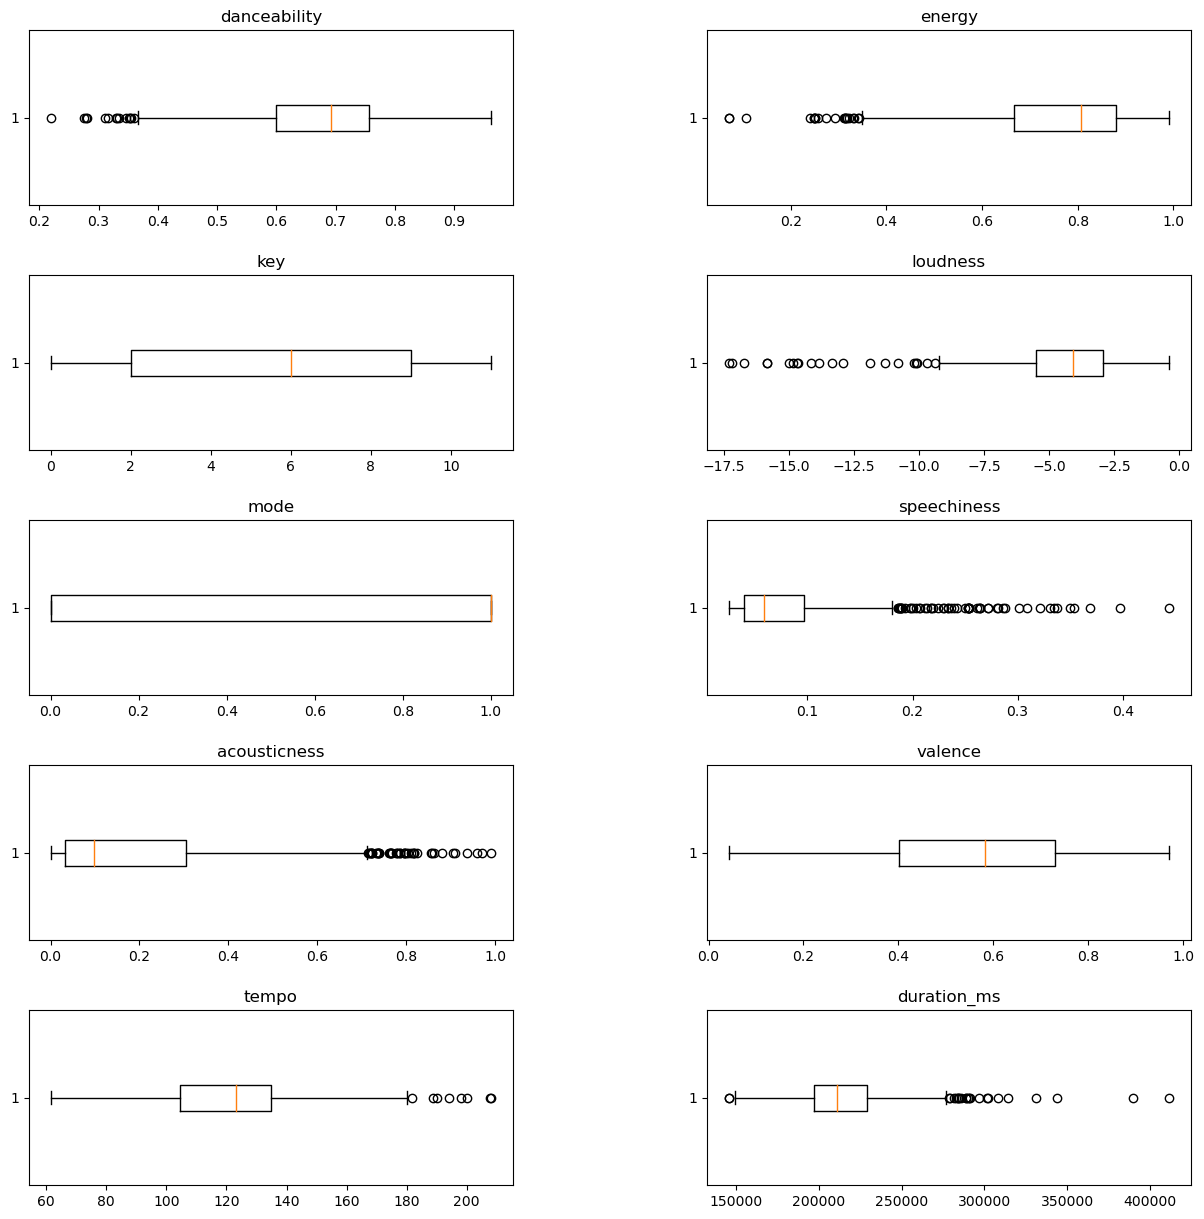

In [14]:
# create a list of column names to plot
columns_to_plot = list(kpop.columns[3:13])

# create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axes = axes.ravel()

# loop through each column and create a boxplot
for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(kpop[column], vert=False)
    axes[i].set_title(column)

# adjust the layout of the subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# display the plots
plt.show()

The above code generates a boxplot for each of the selected columns in the kpop dataset. The columns represented in the boxplot are danceability, energy, key, loudness, mode, speechiness, acousticness, tempo, duration_ms, and valence.

A boxplot is a type of chart that displays the range, median, and quartiles of a dataset. The box represents the interquartile range (IQR), which includes the middle 50% of the data. The line inside the box is the median, and the whiskers extend to the minimum and maximum values that are not considered outliers. Outliers are plotted as individual points.

The plots can give an idea of the distribution of each feature and help identify possible outliers or interesting patterns in the data.

## *Exploratory Data Analysis*

In [15]:
#finds the correlation of each column in a dataframe
corr=kpop.corr()
corr

,songID,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,time_signature
songID,1.000000,-0.187757,-0.229840,0.024512,-0.275632,0.063462,-0.087958,0.281423,-0.079011,0.002976,0.366649,-0.028172
danceability,-0.187757,1.000000,0.374983,-0.005910,0.248564,-0.142434,0.070809,-0.443556,0.568533,-0.207719,-0.399598,0.119090
energy,-0.229840,0.374983,1.000000,0.011810,0.747801,-0.220344,0.221412,-0.710827,0.519506,0.131700,-0.348307,0.091266
key,0.024512,-0.005910,0.011810,1.000000,0.004842,-0.148245,0.032672,0.022855,0.017067,-0.009987,0.013990,0.016841
loudness,-0.275632,0.248564,0.747801,0.004842,1.000000,-0.158674,0.112410,-0.469930,0.360661,0.068310,-0.270477,0.057129
mode,0.063462,-0.142434,-0.220344,-0.148245,-0.158674,1.000000,-0.075674,0.209474,-0.176663,0.083803,0.117518,-0.074957
speechiness,-0.087958,0.070809,0.221412,0.032672,0.112410,-0.075674,1.000000,-0.161313,0.176083,0.098370,-0.156735,0.053931
acousticness,0.281423,-0.443556,-0.710827,0.022855,-0.469930,0.209474,-0.161313,1.000000,-0.421663,-0.086990,0.357968,-0.118140
valence,-0.079011,0.568533,0.519506,0.017067,0.360661,-0.176663,0.176083,-0.421663,1.000000,0.015397,-0.358112,0.076055
tempo,0.002976,-0.207719,0.131700,-0.009987,0.068310,0.083803,0.098370,-0.086990,0.015397,1.000000,0.032765,-0.091820


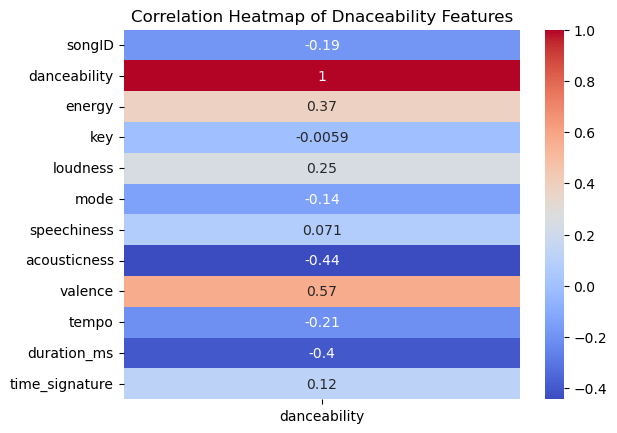

In [16]:
# select only the correlation values for danceability
danceability_corr = corr['danceability']

# create a heatmap of the correlation values
sns.heatmap(danceability_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Dnaceability Features')
plt.show()

## *Barplot*

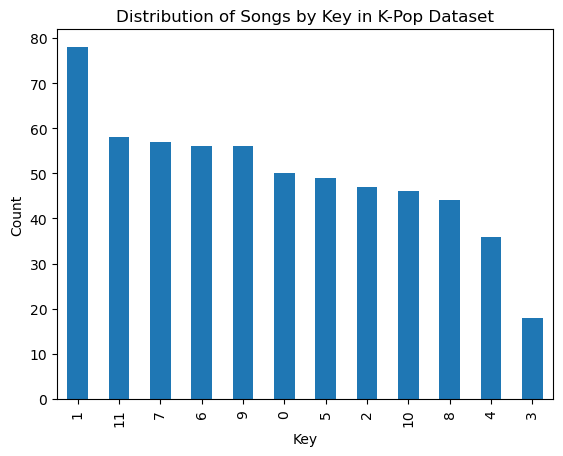

In [17]:
#Count the occurrences of each value in the 'key' column and plot as a bar chart
kpop['key'].value_counts().plot(kind='bar')
#Add labels and title
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Distribution of Songs by Key in K-Pop Dataset')
#Show the plot
plt.show()

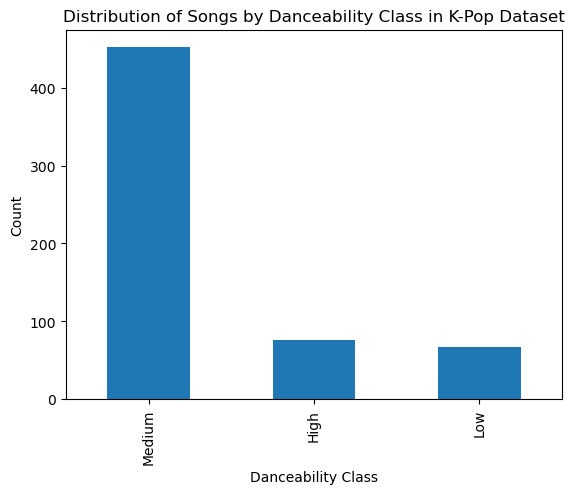

In [18]:
#Count the occurrences of each value in the danceability_class column and plot as a bar chart
kpop["danceability_class"].value_counts().plot(kind='bar')
#Add labels and title
plt.xlabel("Danceability Class")
plt.ylabel('Count')
plt.title('Distribution of Songs by Danceability Class in K-Pop Dataset')
#Show the plot
plt.show()

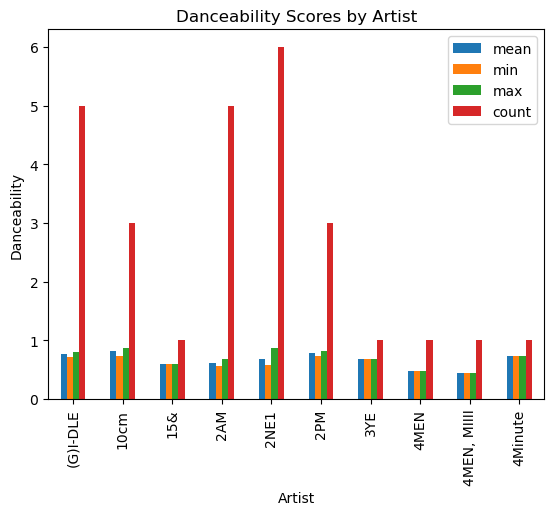

In [19]:
#code plots the average, minimum, maximum and count of danceability scores for the top 10 artists in the kpop dataset.
kpop.groupby('artist')['danceability'].agg(['mean','min','max','count'])[:10].plot(kind='bar')
plt.xlabel("Artist")
plt.ylabel("Danceability")
plt.title("Danceability Scores by Artist")
plt.show()

The given code groups the K-Pop songs by their respective artists and calculates the mean, minimum, maximum, and count of danceability scores for each artist. The resulting data is then plotted in a bar chart, where the x-axis represents the artists and the y-axis represents the danceability scores. Only the first 10 artists are shown in the plot.

The plot helps in comparing the danceability scores of different artists. It shows which artists have higher or lower danceability scores on average and also gives an idea of the range of danceability scores for each artist. The plot can be used to identify the popular artists who tend to produce highly danceable songs and also the artists who tend to produce songs with lower danceability scores.

## *Pie Chart*

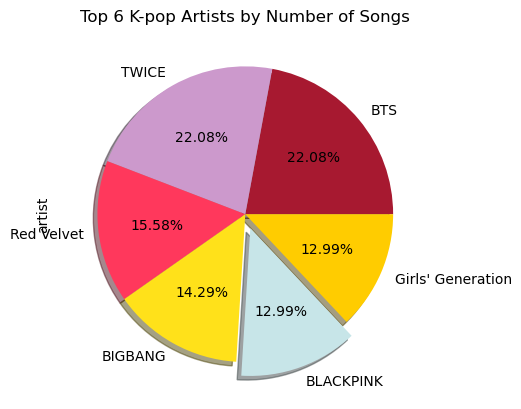

In [20]:
#Define the colors
colors = {'BTS': '#A71930', 'Twice': '#CC99CC', 'Red Velvet': '#FF385C', 'BigBang': '#FFE11A', 'BlackPink': '#C7E5E8', 'Girls Generation': '#FFCC00'}
#creates a pie chart of the top 6 artists in the kpop dataset, showing the proportion of songs contributed by each artist.
kpop['artist'].value_counts()[:6].plot(kind='pie',autopct="%1.2f%%",explode=(0,0,0,0,0.1,0),shadow=True,colors=colors.values())
# Add a title
plt.title('Top 6 K-pop Artists by Number of Songs')
plt.show()

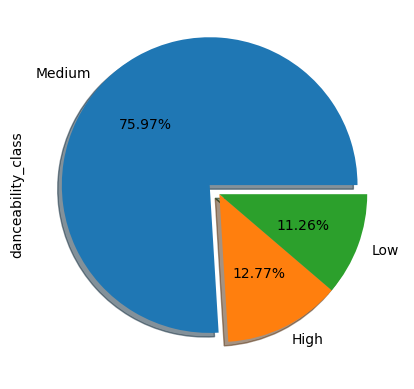

In [21]:
#creates a pie chart of the danceability class in the kpop dataset, showing the proportion of songs contributed by each class.
kpop["danceability_class"].value_counts().plot(kind='pie',autopct="%1.2f%%",explode=(0.09,0,0,),shadow=True)
# Add a title
#plt.title('Top 6 K-pop Artists by Number of Songs')
plt.show()

## *Distplot*

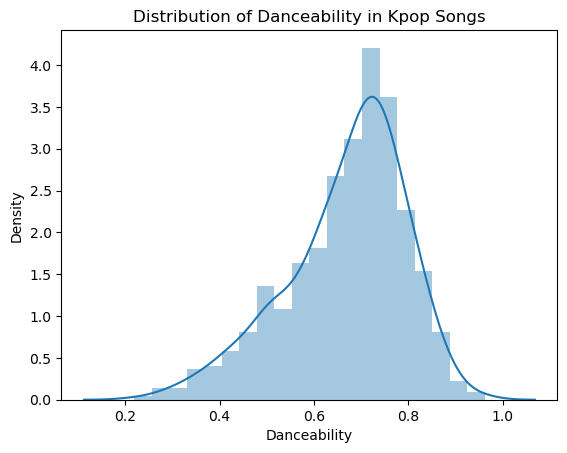

In [22]:
#This is a distribution plot for the "danceability" column in the kpop dataset.
sns.distplot(kpop['danceability'])
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.title('Distribution of Danceability in Kpop Songs')
plt.show()

The code creates a distplot of the distribution of the 'danceability' column in the kpop dataset using the Seaborn library. The x-axis represents the range of danceability values, and the y-axis represents the frequency of each value in the dataset. The graph shows that the majority of songs have a danceability score between 0.6 and 0.8, with a peak around 0.7. The distribution is slightly skewed to the left, indicating that there are more songs with higher danceability scores than lower ones. Overall, the graph provides a quick and easy-to-understand visualization of the distribution of danceability scores in the kpop dataset.





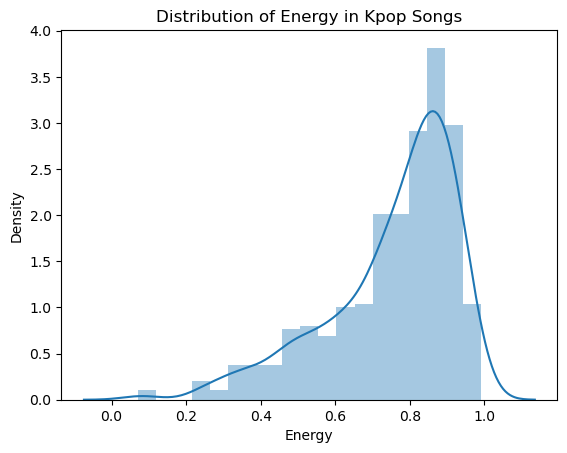

In [23]:
#plot the distribution of Energy with kernel density estimation
sns.distplot(kpop['energy'])
plt.xlabel('Energy')
plt.ylabel('Density')
plt.title('Distribution of Energy in Kpop Songs')
plt.show()

The plot shows that the 'energy' feature is positively skewed, with a majority of songs having an energy score between 0.5 and 1.0. There are also a small number of songs with an energy score close to 0.0. The plot indicates that the 'energy' feature is not normally distributed, which may be important to consider when performing certain statistical analyses.






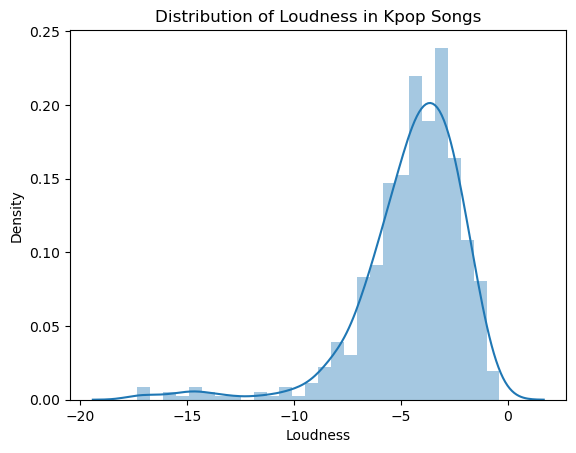

In [24]:
#plot the distribution of loudness with kernel density estimation
sns.distplot(kpop['loudness'])
plt.xlabel('Loudness')
plt.ylabel('Density')
plt.title('Distribution of Loudness in Kpop Songs')
plt.show()

The distribution of the "loudness" feature, which appears to be normally distributed, with the highest density of observations occurring around the center of the distribution. The KDE plot is a smooth curve that estimates the underlying distribution of the data, and the distplot shows the count of observations in each bin.

The x-axis represents the range of values for the "loudness" feature, and the y-axis represents the density or probability of observing a given value in that range. The vertical lines on the KDE plot represent the quartiles of the distribution, while the shaded area under the curve represents the entire distribution.

Overall, the output indicates that the "loudness" feature in the Kpop dataset is normally distributed, with most observations falling within a narrow range of values around the center of the distribution.

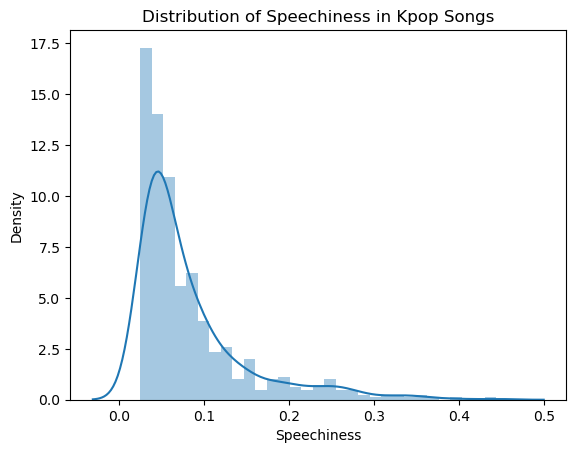

In [25]:
#plot the distribution of Speechiness with kernel density estimation
sns.distplot(kpop['speechiness'])
plt.xlabel('Speechiness')
plt.ylabel('Density')
plt.title('Distribution of Speechiness in Kpop Songs')
plt.show()

The distplot shows that the majority of the songs have low speechiness values, with a peak around 0.05. There are also some songs with high speechiness values, but they are relatively rare. The density curve shows a smooth estimate of the distribution and indicates that the distribution is skewed to the right.

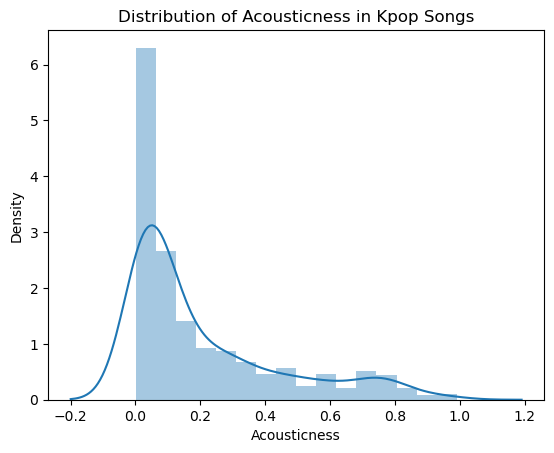

In [26]:
#plot the distribution of acousticness with kernel density estimation
sns.distplot(kpop['acousticness'])
plt.xlabel('Acousticness')
plt.ylabel('Density')
plt.title('Distribution of Acousticness in Kpop Songs')
plt.show()

Distribution of "acousticness" values ranging from 0 to 1. The distplot shows that the majority of the songs in the dataset have an "acousticness" value between 0 and 0.2. The kernel density estimate plot shows a peak around 0.1, indicating that this is the most common "acousticness" value for the songs in the dataset.

Overall, this plot gives insight into the distribution of "acousticness" values in the kpop songs dataset.

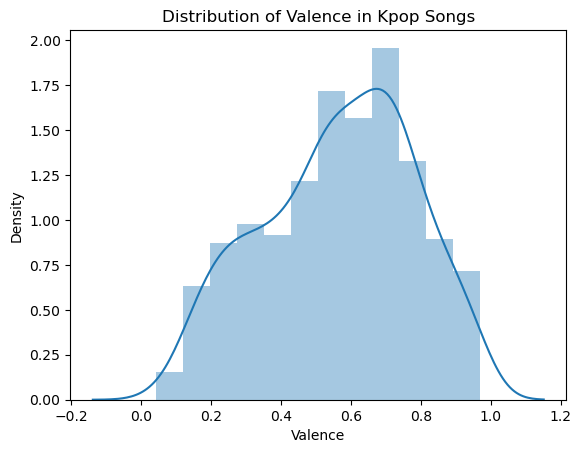

In [27]:
#plot the distribution of Valence with kernel density estimation
sns.distplot(kpop['valence'])
plt.xlabel('Valence')
plt.ylabel('Density')
plt.title('Distribution of Valence in Kpop Songs')
plt.show()

The resulting plot shows a bell-shaped curve with a peak around the middle of the range of values, indicating that the majority of songs have a moderate valence score. The distribution appears to be slightly skewed to the right, indicating that there are more songs with high valence scores than low valence scores.
the distribution is smooth and continuous, with no obvious gaps or outliers.

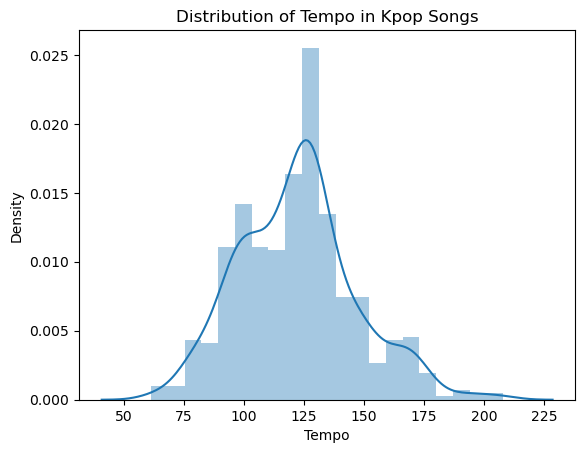

In [28]:
#plot the distribution of Tempo with kernel density estimation
sns.distplot(kpop['tempo'])
plt.xlabel('Tempo')
plt.ylabel('Density')
plt.title('Distribution of Tempo in Kpop Songs')
plt.show()

The distribution of 'tempo' is roughly normal with a mean around 127 BPM. There is also a small peak around 100 BPM, indicating that some songs in the dataset have a slower tempo. The KDE curve shows a smooth estimation of the probability density function of 'tempo'.





## *Countplot*

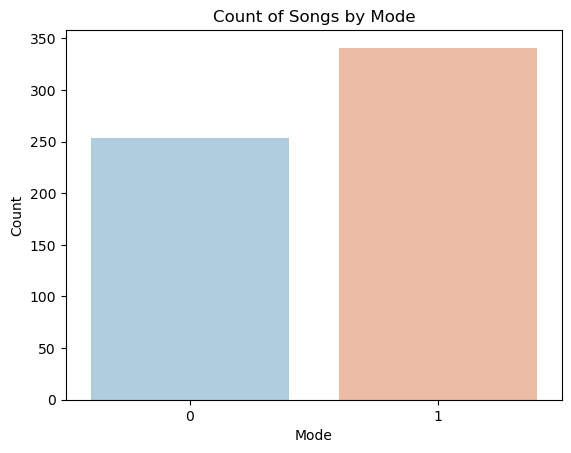

In [29]:
#This plot shows the count of songs in the dataset categorized by their mode (major or minor).
sns.countplot(data=kpop,x='mode',palette='RdBu_r')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Count of Songs by Mode')
plt.show()

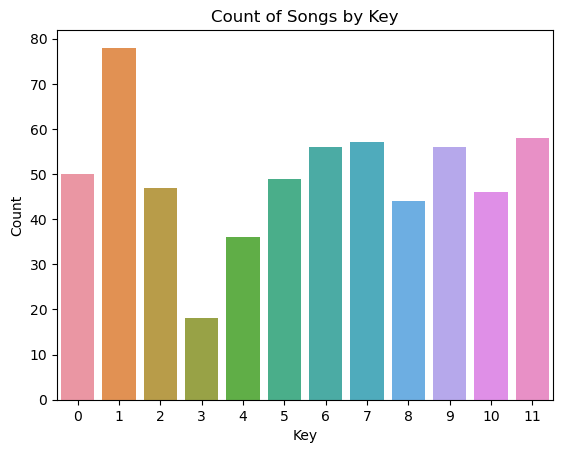

In [30]:
#This plot shows the count of songs in the dataset categorized by their key signature.
sns.countplot(data=kpop,x='key')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Count of Songs by Key')
plt.show()

## *Scatter Plot*

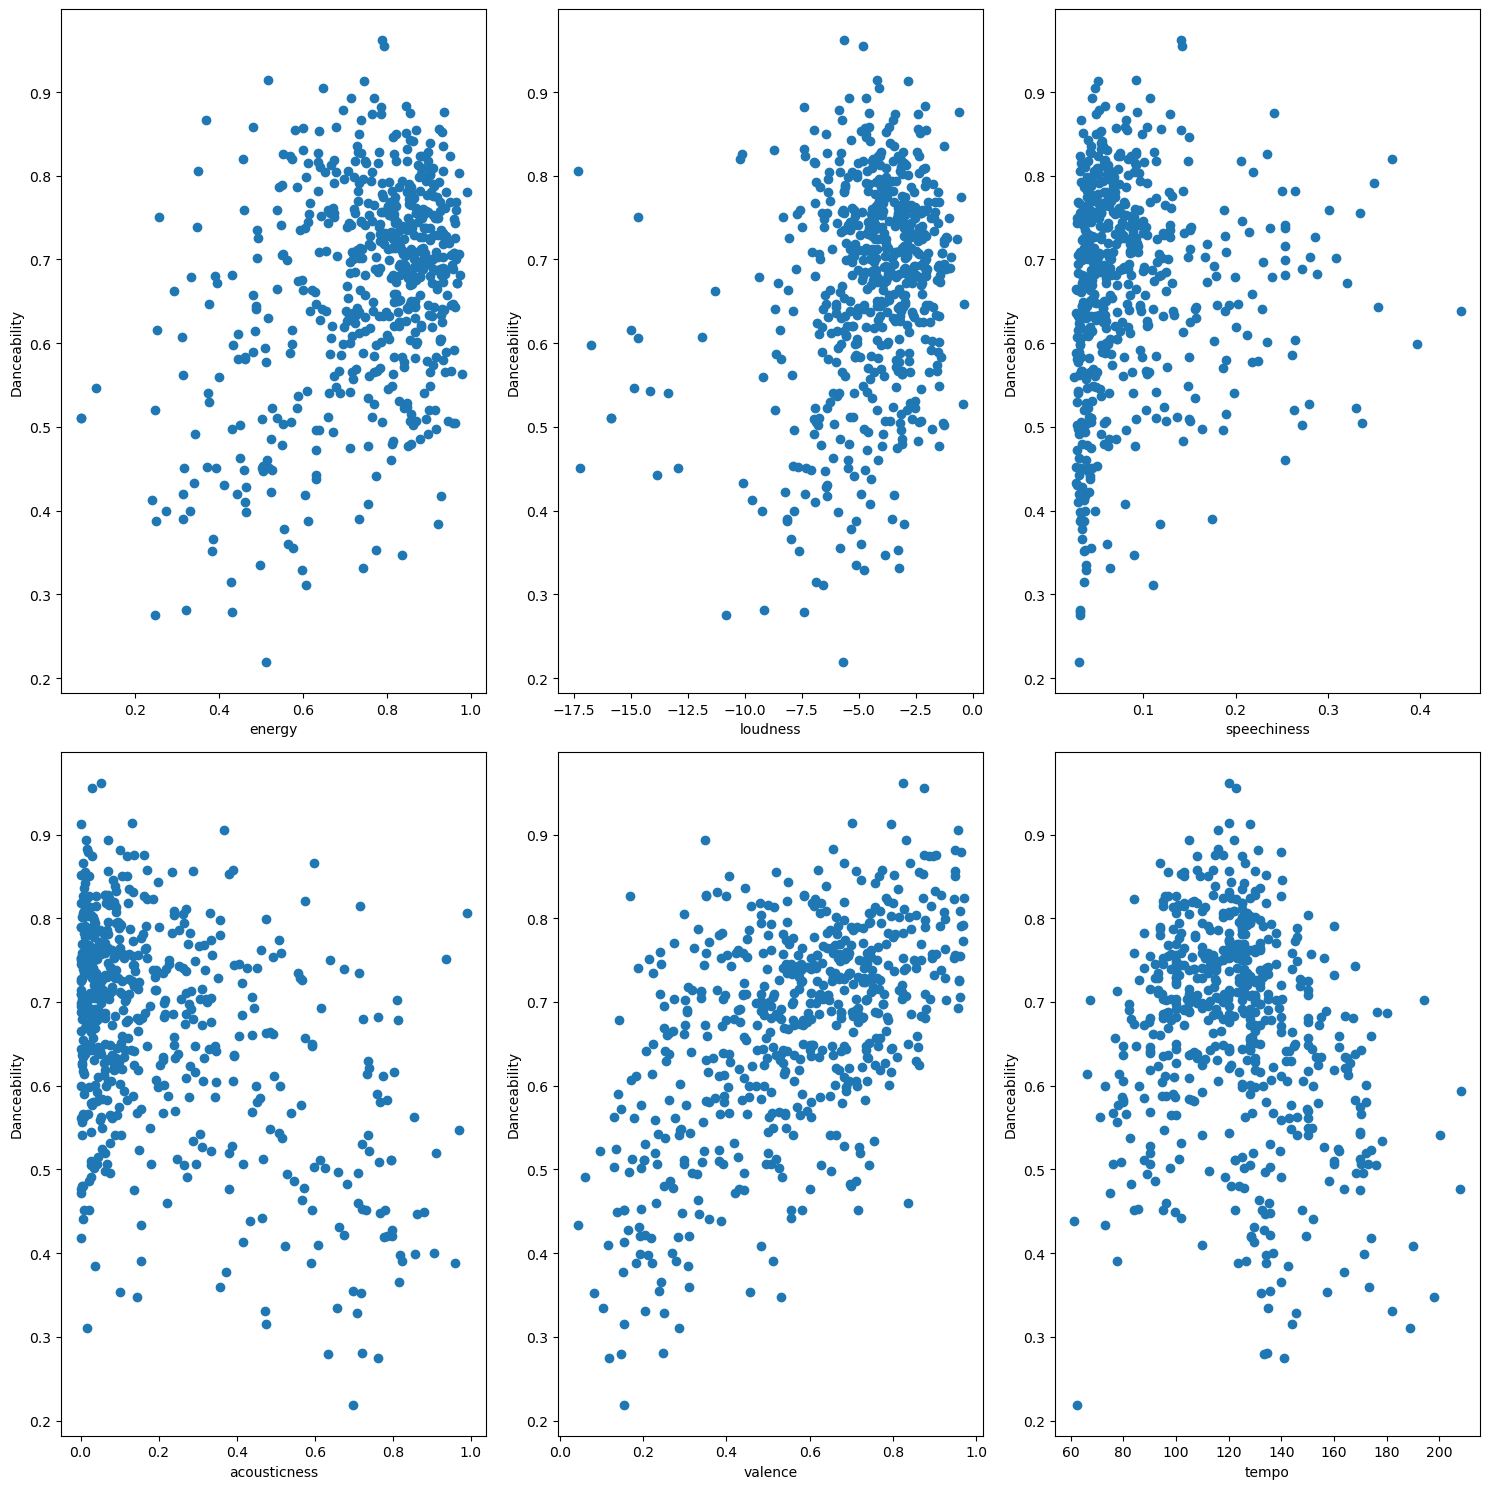

In [31]:
# Define the columns to plot
cols =['energy','loudness','speechiness','acousticness','valence','tempo']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Loop through the columns and plot the scatterplots
for i, col in enumerate(cols):
    ax = axes[int(i/3), i%3]
    ax.scatter(kpop[col], kpop['danceability'])
    ax.set_xlabel(col)
    ax.set_ylabel('Danceability')

plt.tight_layout()
plt.show()

From the scatterplots, we can see that danceability has a positive correlation with energy and valence. This suggests that songs with higher energy and valence tend to have a higher danceability score. On the other hand, danceability has a negative correlation with acousticness and speechiness, indicating that songs with high acousticness and speechiness tend to have a lower danceability score. Finally, there is no clear correlation between danceability and loudness or tempo, as the scatterplots do not show any clear patterns or trends. Overall, these visualizations provide some useful insights into how different musical features relate to danceability.

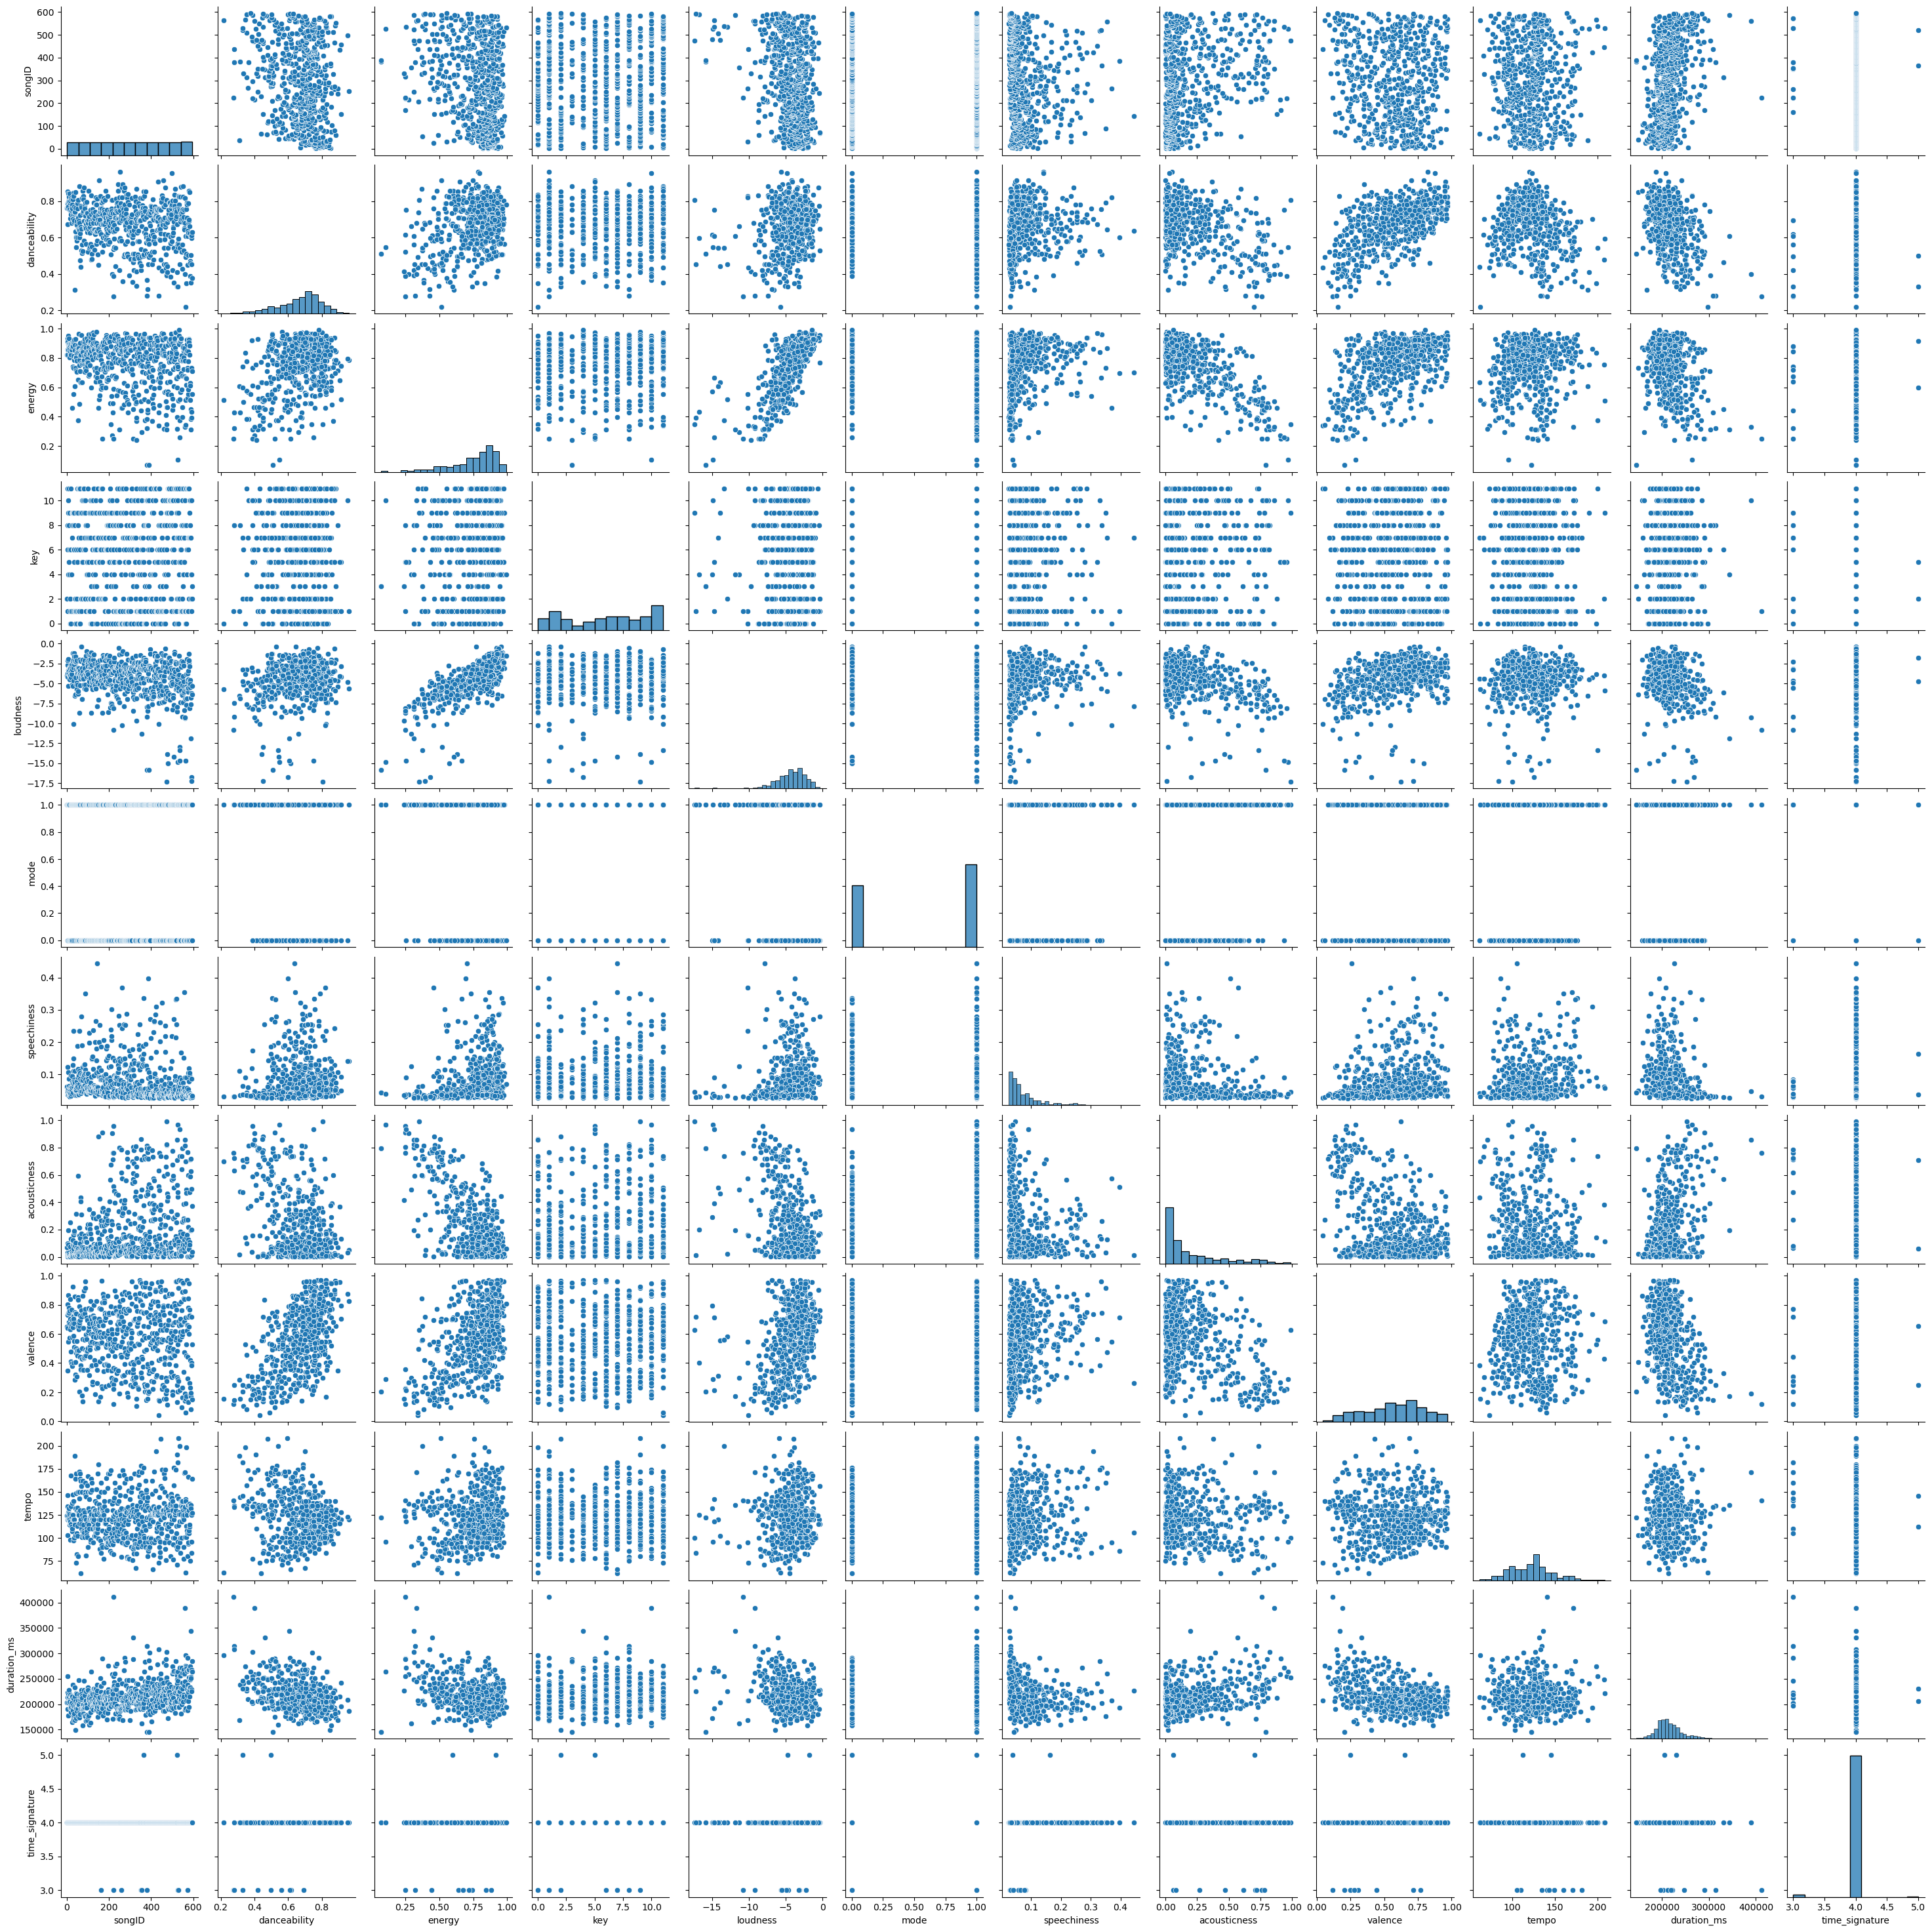

In [32]:
#a pairplot of the kpop dataset, which displays scatterplots for all possible pairs of numerical columns in the dataset, and histograms for each individual column along the diagonal.
sns.pairplot(data=kpop)
plt.show()

## *Separating Features and Target*

In [33]:
#some columns are dropped from the dataset as they are not required for predicting danceability class.
kpop.drop(['songID','title','artist','danceability','time_signature'],axis=1,inplace=True)

The songID, title, and artist columns contain categorical information such as the name of the song and artist, which is not useful for modeling purposes. Additionally, the danceability columns are used to create the danceability_class column, which will be used as the target variable in the classification model. Therefore, these columns are redundant and can be dropped.
time_signature this column indicates the time signature of the song, which is not directly related to the danceability of the song.

In [34]:
#after dropping displaying first rows of dataset
kpop.head()

,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms,danceability_class
0,0.821,2,-4.015,1,0.0628,0.06890,0.651,123.99,203402,Medium
1,0.932,1,-3.784,0,0.0526,0.00212,0.802,134.01,190701,High
2,0.857,6,-2.706,1,0.1230,0.03210,0.641,120.02,222149,Medium
3,0.821,8,-4.175,1,0.0368,0.01450,0.348,102.99,255299,Medium
4,0.913,11,-2.106,1,0.0429,0.09810,0.729,146.01,213758,Medium


In [35]:
# Use categorical values as target and use label encoding for it
le = LabelEncoder()
kpop['danceability_class'] = le.fit_transform(kpop['danceability_class'])

In [36]:
# x and y are defined where x contains all the independent variables and y contains the target variable.
x=kpop.iloc[:,:-1]
y=kpop.iloc[:,-1]

In [37]:
#first 5 rows from x
x.head()

,energy,key,loudness,mode,speechiness,acousticness,valence,tempo,duration_ms
0,0.821,2,-4.015,1,0.0628,0.06890,0.651,123.99,203402
1,0.932,1,-3.784,0,0.0526,0.00212,0.802,134.01,190701
2,0.857,6,-2.706,1,0.1230,0.03210,0.641,120.02,222149
3,0.821,8,-4.175,1,0.0368,0.01450,0.348,102.99,255299
4,0.913,11,-2.106,1,0.0429,0.09810,0.729,146.01,213758


In [38]:
#first 5 records from y
y.head()

0    2
1    0
2    2
3    2
4    2
Name: danceability_class, dtype: int32

In [39]:
#the dataset is split into training and testing data using the train_test_split function from sklearn.
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

## *Model Training*

In [40]:
# Train the model using Random Forest Classifier
rfc = RandomForestClassifier()

In [41]:
# Fit the model on the training data
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [42]:
# Make predictions on testing data
ypred = rfc.predict(xtest)

In [43]:
# calculate and print the accuracy scores of the Random Forest Classifier model on the training and testing sets respectively.
train=rfc.score(xtrain,ytrain)
test=rfc.score(xtest,ytest)
print(train)
print(test)

1.0
0.7815126050420168


In [44]:
# calculate and print the accuracy score, confusion matrix, and classification report of the Random Forest Classifier model on the testing set.
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(ac)
print(cm)
print(cr)

0.7815126050420168
[[ 0  0 17]
 [ 0  3  8]
 [ 0  1 90]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.75      0.27      0.40        11
           2       0.78      0.99      0.87        91

    accuracy                           0.78       119
   macro avg       0.51      0.42      0.42       119
weighted avg       0.67      0.78      0.71       119



## *Conclusion*

The Random Forest Classifier model has achieved an accuracy score of 0.78 on the testing data, which is a good indication that the model is performing well. The precision and recall scores for class 0,1 and 2 (danceable) are also high, indicating that the model is able to accurately predict this class.

The confusion matrix shows that the model has correctly identified the majority of the samples in class 2, which is the most important class for our analysis. The classification report also shows that the model has good precision, recall and f1-score for class 2.

Overall, the Random Forest Classifier model seems to be performing well on the K-pop dataset and could be used for predicting the danceability class of K-pop songs.

In [45]:
kpop.iloc[220]

energy                     0.2500
key                        5.0000
loudness                  -8.1320
mode                       1.0000
speechiness                0.0317
acousticness               0.9590
valence                    0.2210
tempo                    123.3530
duration_ms           255027.0000
danceability_class         1.0000
Name: 220, dtype: float64

In [47]:
x_array=np.array([[0.250,5,-8.132,1,0.0317,0.959,0.221,123.353,255027]]).reshape(1,-1)
ypred=rfc.predict(x_array)
print('Prediction: ',ypred[0])

Prediction:  1


As we can see this model did a good job and the predicted value is close or exact to the real value in the dataset.

## *Prediction of Danceability Class for Unknown Data*

In [50]:
print("Please enter the following values for the new song:")
#getting values from user for prediction
energy = float(input("Energy (0.0-1.0): "))
key = int(input("Key (0-11): "))
loudness = float(input("Loudness (-60.0 to 0.0): "))
mode = int(input("Mode (0 to 1): "))
speechiness = float(input("Speechiness (0.0-1.0): "))
acousticness = float(input("Acousticness (0.0-1.0): "))
valence = float(input("Valence (0.0-1.0): "))
tempo = float(input("Tempo (BPM): "))
duration_ms = int(input("Duration (in milliseconds): "))

# Create a new data point using the user inputs
new_song = [[energy, key, loudness, mode, speechiness, acousticness, valence, tempo, duration_ms]]

# Make a prediction using the trained model
Prediction = rfc.predict(new_song)
print('Prediction: ',Prediction[0])

# Print the predicted danceability class
if Prediction == 1:
    print("Low danceability")
elif Prediction == 2:
    print("Medium danceability")
else:
    print("High danceability")

Please enter the following values for the new song:
Energy (0.0-1.0): 0.880
Key (0-11): 10
Loudness (-60.0 to 0.0): -2.888
Mode (0 to 1): 1
Speechiness (0.0-1.0): 0.0872
Acousticness (0.0-1.0): 0.0362
Valence (0.0-1.0): 0.721
Tempo (BPM): 121.987
Duration (in milliseconds): 180378
Prediction:  2
Medium danceability
